24rp15338

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
import pandas as pd

In [74]:
from sklearn.model_selection import train_test_split


In [9]:
df = pd.read_csv("BankNote_Authentication.csv")

In [19]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = df.drop('class', axis=1)
y = df['class']
X_scaled = scaler.fit_transform(X)

In [80]:
scaler = StandardScaler()
x = df.drop ("class", axis=1)
y = df["class"]
x_scaled = scaler.fit_transform(x)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [88]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [92]:
param_grid = {
    "max_depth":[3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 15]
}

In [ ]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt_classifier = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

In [98]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [100]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [102]:
best_dt_classifier = grid_search.best_estimator_

In [104]:
print (f"Best parameters: { grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2}


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [108]:
import matplotlib.pyplot as plt

In [110]:
from sklearn.tree import plot_tree

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [134]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
best_dt_classifier = DecisionTreeClassifier()
best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [138]:
y_pred = best_dt_classifier.predict(X_test)

In [142]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [144]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9782
Precision: 0.9919
Recall: 0.9606
F1-Score: 0.9760


In [146]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [148]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[147   1]
 [  5 122]]


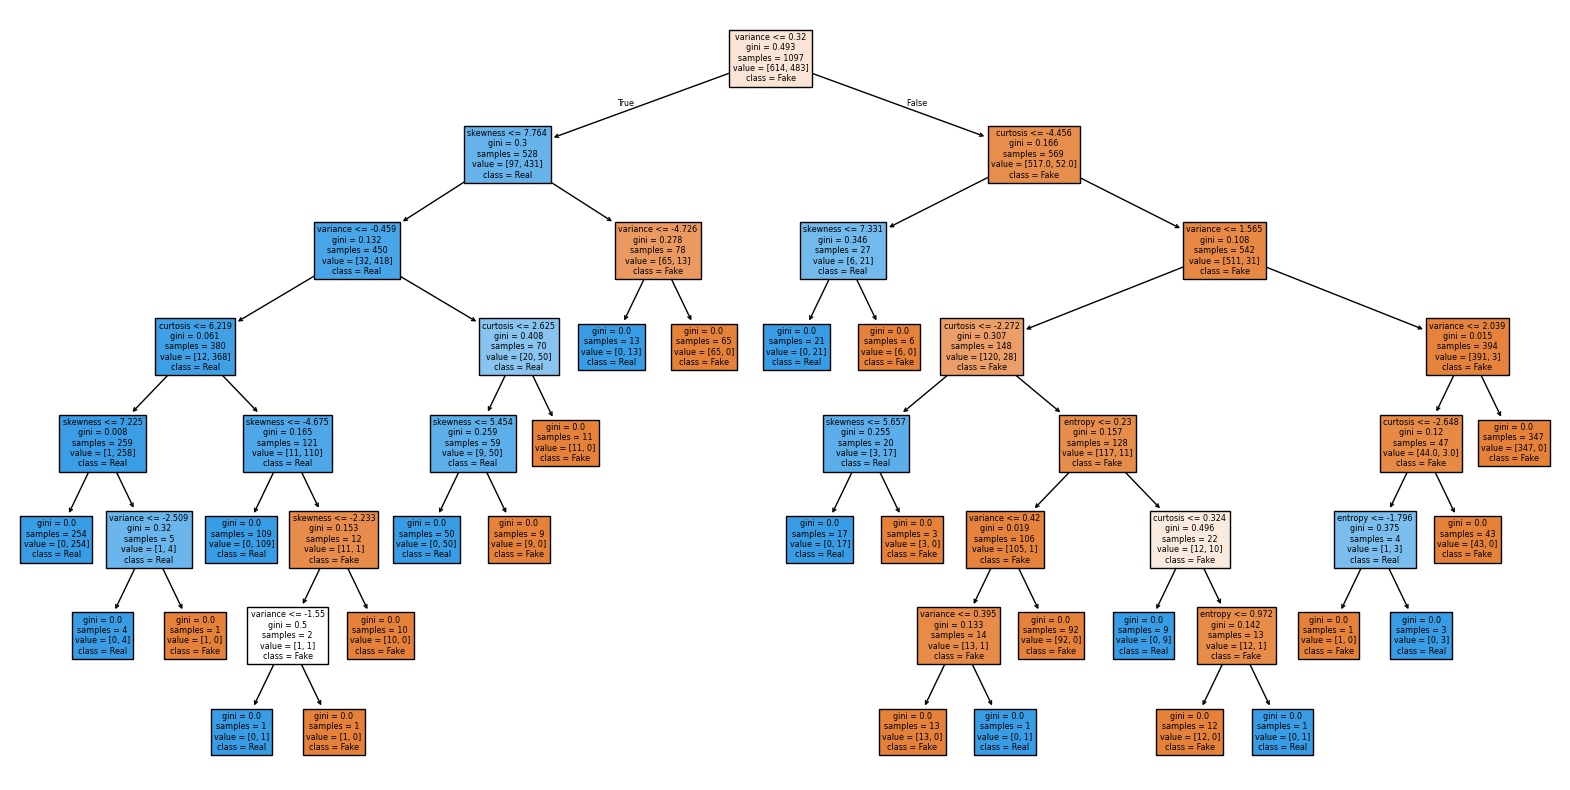

In [150]:
plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['Fake', 'Real'])
plt.show()

In [164]:
import gradio as gr

In [166]:
def predict_banknote(variance, skewness, entropy):
    input_data = [[variance, skewness, entropy]]
    input_scaled = scaler.transform(input_data)
    prediction = best_dt_classifier.predict(input_scaled)
    return "Real" if prediction[0] == 1 else "Fake"

In [168]:
iface = gr.Interface(
    fn=predict_banknote,
    inputs=[
        gr.Number(label="Variance"),
        gr.Number(label="Skewness"),
        gr.Number(label="Entropy")
    ],
    outputs="text",
    title="Banknote Authentication",
    description="Enter the banknote features to classify it as Real or Fake."
)

In [170]:
iface.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
